In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


## Задание 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [10]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(zp)

b1 = (n * np.sum(zp * ks) - np.sum(zp) * np.sum(ks)) / (n * np.sum(zp ** 2) - np.sum(zp) ** 2)
b0 = np.mean(ks) - b1 * np.mean(zp)

print('коэффициенты', b0, 'и', b1)

коэффициенты 444.17735732435955 и 2.6205388824027653


In [11]:
# без интерсепта
x = zp.reshape((n,1))
y = ks.reshape((n,1))
b = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T,y))
y_pred_wo_i = b * x
print('коэффициент', b[0][0])

коэффициент 5.889820420132688


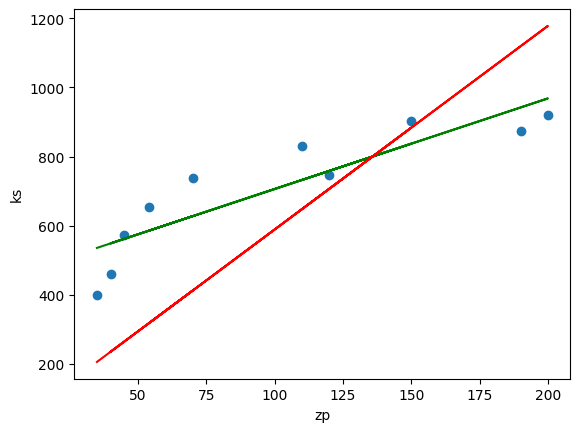

In [4]:
y_pred = b0 + b1 * zp

plt.xlabel('zp')
plt.ylabel('ks')
plt.plot(zp, y_pred, 'g')
plt.plot(zp, y_pred_wo_i, 'r')
plt.scatter(zp, ks)
plt.show()

## Задание 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [5]:
def mse_(b, x = zp, y = ks, n = n):
    return np.sum((b * zp - ks) ** 2) / n
alpha = 1e-6
b_gr = 0.1 # стартовое

for i in range(3000):
    temp = b_gr
    b_gr -= alpha * (2 / n) * np.sum((b_gr * zp - ks) * zp)
    if b_gr == temp:
        print('Итерация = {i}, коэффициент = {b_gr}, mse = {mse}'.format(i = i, b_gr = b_gr, mse = mse_(b_gr)))
        break

Итерация = 1196, коэффициент = 5.889820420132673, mse = 56516.85841571943
